In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import truncnorm

sns.set(rc={'figure.figsize':(11.7,8.27)})

seed = 11148705
np.random.seed(seed)

In [10]:
def plot_graph(G):
    pos = nx.get_node_attributes(G, 'pos') 
    dists = [(x - 0.5)**2 + (y - 0.5)**2 for x, y in list(pos.values())]
    ncenter = np.argmin(dists)
    
    p = nx.single_source_shortest_path_length(G, ncenter)
    plt.figure()
    nx.draw_networkx_edges(G, pos, alpha=0.4)
    nx.draw_networkx_nodes(
        G, pos, nodelist=list(p.keys()),
        node_size=120, alpha=1,
        node_color=list(p.values()), cmap="jet")
    
    plt.show()


In [11]:
from rr_model.model import Industry

In [12]:
def make_graph(l, u, N=30):
    theta_one = 0.2
    theta_two = 0.2
    overhead = 0.06

    p = {i: (np.random.uniform(0, 1), np.random.uniform(0, 1)) for i in range(N)}
    Is = {
        i:{
            "I": Industry(
                fixed_costs=np.random.uniform(l, u),
                fixed_overhead=overhead,
                alpha=3,
                theta_one=theta_one,
                theta_two=theta_two,
            )
          } for i in range(N)
    }
    
    G = nx.random_geometric_graph(N, .4, pos=p, seed=seed)
    nx.set_node_attributes(G, Is)

    return G

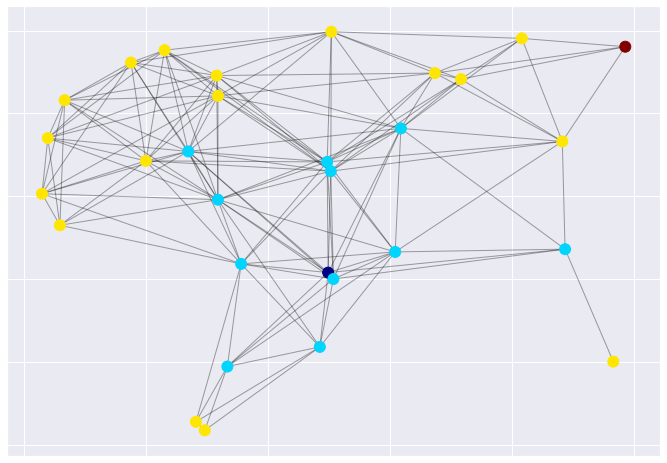

In [13]:
G = make_graph(0.01, 0.1)
plot_graph(G)

In [14]:
G